# Problema 1

Se nos pide construir el siguiente circuito cuántico 

$$|\psi \rangle =\frac{1}{\sqrt{2}}|01\rangle-\frac{1}{\sqrt{2}}|10\rangle$$

Para construirlo, partimos como es de usual, del estado $$|\psi \rangle=|00\rangle$$

Le aplicamos la compuerta NOT al primer qubit $$|\psi \rangle=|01\rangle$$

Notamos que el circuito es un circuito entrelazado, para ello aplicamos la compuerta de Hadamard al primer qubit

$$|\psi \rangle=\frac{1}{\sqrt{2}}|00\rangle-\frac{1}{\sqrt{2}}|01\rangle$$

Ahora usamos la compuerta NOT en el segundo qubit

$$|\psi \rangle=\frac{1}{\sqrt{2}}|10\rangle-\frac{1}{\sqrt{2}}|11\rangle$$

Finalmente usamos la compuerta CNOT y tomamos como qubit de control al primero y como target al segundo

$$|\psi \rangle=\frac{1}{\sqrt{2}}|10\rangle-\frac{1}{\sqrt{2}}|01\rangle$$


In [2]:
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler

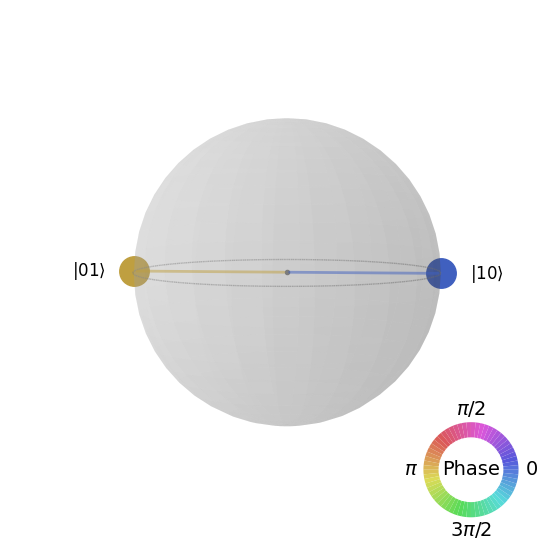

In [3]:
qc = QuantumCircuit(2)

qc.x(0)  
qc.h(0)  
qc.x(1)  
qc.cx(0,1)  

plot_state_qsphere(qc)

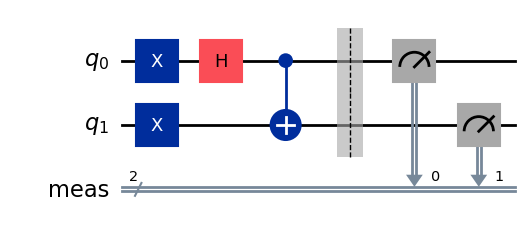

In [4]:
qc.measure_all()
qc.draw(output='mpl')

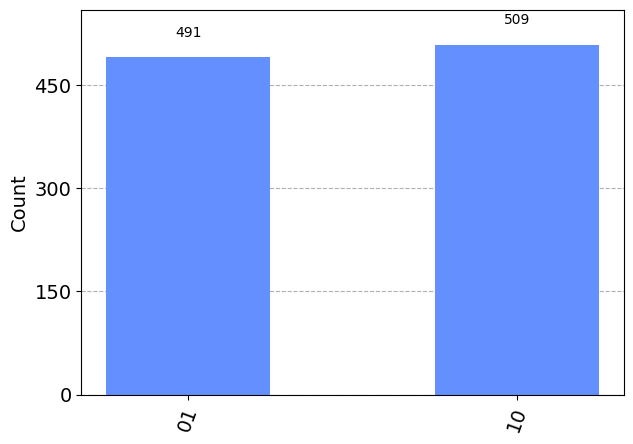

In [5]:
# Simulador

sampler = StatevectorSampler()

job = sampler.run([qc] , shots=1000) 

result = job.result()

data = result[0].data

bitstrings = data.meas.get_bitstrings()

counts = data.meas.get_counts()


# Gráfico histograma
plot_histogram( counts )

Dado el circuito cuántico construido anteriormente, al intentar hacer una medición del sistema cuántico, saldrán uno de los 2 estados existentes $$|01\rangle$$ o $$|10\rangle$$ Teoricamente la probabilidad de medir cualquiera de los 2 estados es de 1/2, en la realidad son valores muy cercanos a 1/2, al aumentar el número de mediciones (counts) estos valores tienden a 1/2, este proceso es análogo al lanzamiento de una moneda en términos de probabilidades.

# Problema 2

Se nos pide construir 3 estados GHZ para n = 2,3,4 

$$|\psi_1 \rangle =\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

$$|\psi_2 \rangle =\frac{|000\rangle+|111\rangle}{\sqrt{2}}$$

$$|\psi_3 \rangle =\frac{|0000\rangle+|1111\rangle}{\sqrt{2}}$$

La construcción de estos circuitos es análoga, solo necesitamos aplicar primero la compuerta de Hadamard al primer qubit y aplicar la compuerta CNOT n-1 veces

Circuito para n = 2, como siempre partimos del estado base $$|\psi_1 \rangle=|00\rangle$$

Aplicamos Hadamard al primer qubit

$$|\psi_1 \rangle =\frac{|00\rangle+|01\rangle}{\sqrt{2}}$$

Finalmente aplicamos CNOT tomando como qubit de control al primero y como target al segundo 


$$|\psi_1 \rangle =\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$


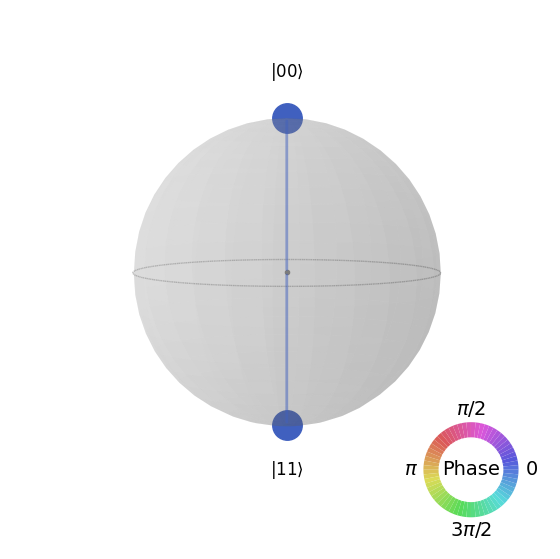

In [3]:
Circuit1 = QuantumCircuit(2)

Circuit1.h(0)
Circuit1.cx(0,1)

plot_state_qsphere(Circuit1)


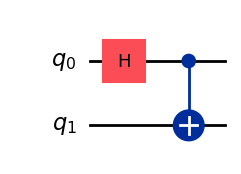

In [4]:
Circuit1.draw(output='mpl')

Circuito para n = 3, como siempre partimos del estado base $$|\psi_2 \rangle=|000\rangle$$

Aplicamos Hadamard al primer qubit

$$|\psi_2 \rangle =\frac{|000\rangle+|001\rangle}{\sqrt{2}}$$

Aplicamos CNOT tomando como qubit de control al primero y como target al segundo 

$$|\psi_2 \rangle =\frac{|000\rangle+|011\rangle}{\sqrt{2}}$$

Finalmente aplicamos CNOT tomando como qubit de control al segundo y como target al tercero

$$|\psi_2 \rangle =\frac{|000\rangle+|111\rangle}{\sqrt{2}}$$


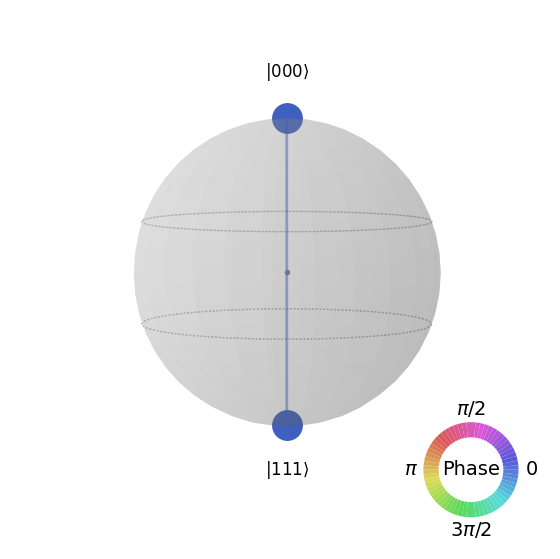

In [7]:
Circuit2 = QuantumCircuit(3)

Circuit2.h(0)
Circuit2.cx(0,1)
Circuit2.cx(1,2)


plot_state_qsphere(Circuit2)


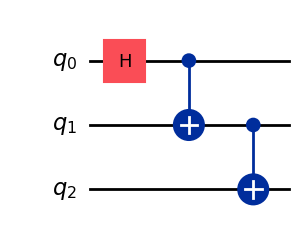

In [8]:
Circuit2.draw(output='mpl')

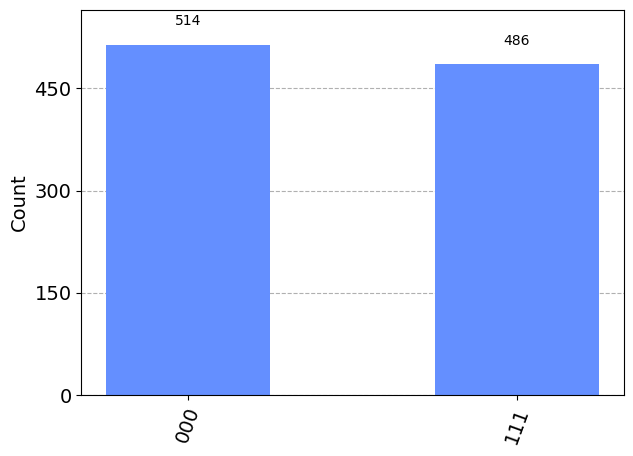

In [20]:
Circuit2.measure_all()


sampler = StatevectorSampler()

job = sampler.run([Circuit2] , shots=1000) 

result = job.result()

data = result[0].data

bitstrings = data.meas.get_bitstrings()

counts = data.meas.get_counts()


# Gráfico histograma
plot_histogram( counts )

Este histograma representa la cantidad de veces que se midieron los estados $$|000\rangle$$ y $$|111\rangle$$ de un total de 1000 mediciones (counts), al igual que el circuito anterior, cada estado tiene una probalidad teórica de 1/2 de ser medido, pero realmente son valores cercanos a 1/2 y no exactamente 1/2.

Circuito para n = 4, como siempre partimos del estado base $$|\psi_3 \rangle=|0000\rangle$$

Aplicamos Hadamard al primer qubit

$$|\psi_3 \rangle =\frac{|0000\rangle+|0001\rangle}{\sqrt{2}}$$

Aplicamos CNOT tomando como qubit de control al primero y como target al segundo 

$$|\psi_3 \rangle =\frac{|0000\rangle+|0011\rangle}{\sqrt{2}}$$

Aplicamos CNOT tomando como qubit de control al segundo y como target al tercero

$$|\psi_3 \rangle =\frac{|0000\rangle+|0111\rangle}{\sqrt{2}}$$

Finalmente aplicamos CNOT tomando como qubit de control al tercero y como target al cuarto

$$|\psi_3 \rangle =\frac{|0000\rangle+|1111\rangle}{\sqrt{2}}$$


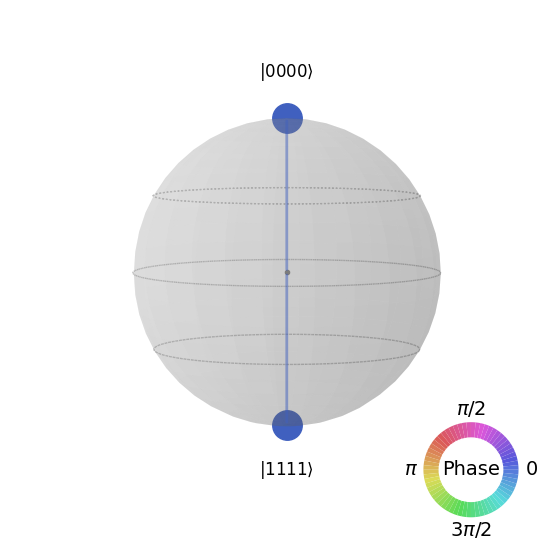

In [11]:
Circuit3 = QuantumCircuit(4)

Circuit3.h(0)
Circuit3.cx(0,1)
Circuit3.cx(1,2)
Circuit3.cx(2,3)

plot_state_qsphere(Circuit3)

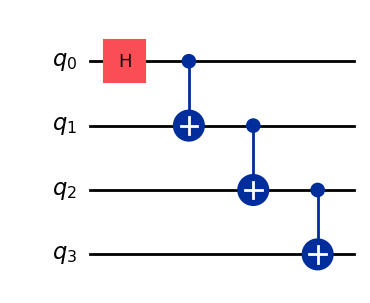

In [10]:
Circuit3.draw(output='mpl')